In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
city=pd.get_dummies(df['Geography'])
city

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [12]:
gender=pd.get_dummies(df['Gender'])
gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [13]:
df = pd.concat([df,city,gender],axis=1)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [19]:
df.drop(['Geography','Gender'],axis=1,inplace=True)

In [20]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [21]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain', 'Female', 'Male'],
      dtype='object')

In [24]:
x=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Germany',
       'Spain', 'Female', 'Male']]
y=df['Exited']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [34]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [40]:
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu",               units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid",            units=1, kernel_initializer="uniform"))

In [41]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [43]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 84        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [44]:
classifier.fit(x_tain,y_train,batch_size=10,epochs=50)

Epoch 1/50
800/800 [==============================] - 5s 4ms/step - loss: 0.5416 - accuracy: 0.7901
Epoch 2/50
800/800 [==============================] - 3s 4ms/step - loss: 0.5274 - accuracy: 0.7926
Epoch 3/50
800/800 [==============================] - 3s 4ms/step - loss: 0.5220 - accuracy: 0.7926
Epoch 4/50
800/800 [==============================] - 3s 4ms/step - loss: 0.5222 - accuracy: 0.7926
Epoch 5/50
800/800 [==============================] - 3s 4ms/step - loss: 0.5176 - accuracy: 0.7926
Epoch 6/50
800/800 [==============================] - 3s 4ms/step - loss: 0.5168 - accuracy: 0.7926
Epoch 7/50
800/800 [==============================] - 3s 4ms/step - loss: 0.5147 - accuracy: 0.7926
Epoch 8/50
800/800 [==============================] - 3s 4ms/step - loss: 0.5136 - accuracy: 0.7926
Epoch 9/50
800/800 [==============================] - 3s 4ms/step - loss: 0.5139 - accuracy: 0.7926
Epoch 10/50
800/800 [==============================] - 3s 4ms/step - loss: 0.5123 - accuracy: 0.7926

In [46]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 3ms/step


In [48]:
accuracy_score(y_test, y_pred)

0.811

In [51]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[1622,    0],
       [ 378,    0]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

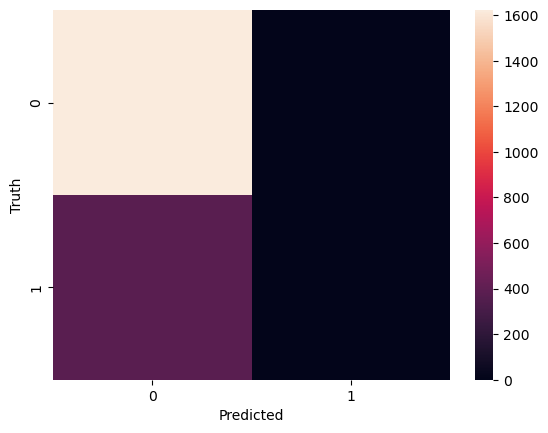

In [53]:
sns.heatmap(cm)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1622
           1       0.00      0.00      0.00       378

    accuracy                           0.81      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.66      0.81      0.73      2000



C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
